In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import mlflow

np.set_printoptions(precision=3, suppress=True)
tf.__version__

'2.4.1'

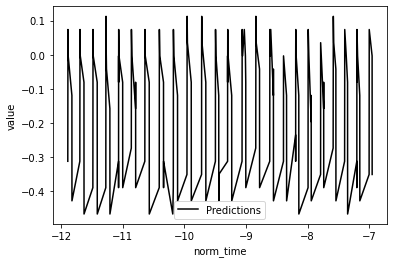

In [195]:
# Read dataset from file
raw_dataset = pd.read_csv("./data_grouped/1161114002_122.csv")
raw_dataset = raw_dataset.astype({'id':'float','value':'float', 'station_id':'int', 'parameter_id':'int', 'unix_timestamp':'int', 'norm_time':'float'})
dataset = raw_dataset.copy()
dataset = dataset.dropna().drop(['id','station_id','parameter_id','unix_timestamp'], axis=1)
dataset_full = dataset.sort_values(by=['norm_time'])
dataset = dataset_full[0:300]
dataset
# 

plt.plot(dataset['norm_time'], dataset['norm_value'], color='k', label='Predictions')
plt.xlabel('norm_time')
plt.ylabel('value')
plt.legend()
plt.show()

In [196]:
test_file_name = "./data_grouped/1161114002_114.csv"
test_raw_dataset = pd.read_csv(test_file_name)
test_raw_dataset = test_raw_dataset.astype({'id':'float','value':'float', 'station_id':'int', 'parameter_id':'int', 'unix_timestamp':'int', 'norm_time':'float'})
test_dataset = test_raw_dataset.copy()
test_dataset = test_dataset.dropna().drop(['id','station_id','parameter_id','unix_timestamp'], axis=1)
test_dataset_full = test_dataset.sort_values(by=['norm_time'])
start_line = 0
end_line = 44
test_data = test_dataset_full[start_line:end_line]

In [197]:
serial_data = dataset.drop(['value','norm_time'], axis=1)
serial_data['norm_1'] = serial_data['norm_value'].shift(1)
serial_data['norm_2'] = serial_data['norm_value'].shift(2)
serial_data['norm_3'] = serial_data['norm_value'].shift(3)
serial_data['norm_4'] = serial_data['norm_value'].shift(4)
serial_data['norm_5'] = serial_data['norm_value'].shift(5)
serial_data['norm_6'] = serial_data['norm_value'].shift(6)
serial_data = serial_data[6:]
serial_data

,norm_value,norm_1,norm_2,norm_3,norm_4,norm_5,norm_6
6,-0.003110,0.074052,-0.003110,-0.080272,-0.157435,-0.234597,-0.311759
7,-0.118853,-0.003110,0.074052,-0.003110,-0.080272,-0.157435,-0.234597
8,-0.196016,-0.118853,-0.003110,0.074052,-0.003110,-0.080272,-0.157435
9,-0.273178,-0.196016,-0.118853,-0.003110,0.074052,-0.003110,-0.080272
10,-0.350340,-0.273178,-0.196016,-0.118853,-0.003110,0.074052,-0.003110
...,...,...,...,...,...,...,...
295,-0.003110,0.074052,-0.003110,-0.080272,-0.157435,-0.234597,-0.350340
296,-0.080272,-0.003110,0.074052,-0.003110,-0.080272,-0.157435,-0.234597
297,-0.157435,-0.080272,-0.003110,0.074052,-0.003110,-0.080272,-0.157435
298,-0.234597,-0.157435,-0.080272,-0.003110,0.074052,-0.003110,-0.080272


In [198]:
test_serial_data = test_data.drop(['value','norm_time'], axis=1)
test_serial_data['norm_1'] = test_serial_data['norm_value'].shift(1)
test_serial_data['norm_2'] = test_serial_data['norm_value'].shift(2)
test_serial_data['norm_3'] = test_serial_data['norm_value'].shift(3)
test_serial_data['norm_4'] = test_serial_data['norm_value'].shift(4)
test_serial_data['norm_5'] = test_serial_data['norm_value'].shift(5)
test_serial_data['norm_6'] = test_serial_data['norm_value'].shift(6)
test_serial_data = test_serial_data[6:]
test_serial_data

,norm_value,norm_1,norm_2,norm_3,norm_4,norm_5,norm_6
6,-0.563707,-0.737452,-0.911197,-1.084942,-1.258687,-1.084942,-0.911197
7,-0.389961,-0.563707,-0.737452,-0.911197,-1.084942,-1.258687,-1.084942
8,-0.216216,-0.389961,-0.563707,-0.737452,-0.911197,-1.084942,-1.258687
9,-0.389961,-0.216216,-0.389961,-0.563707,-0.737452,-0.911197,-1.084942
10,-0.563707,-0.389961,-0.216216,-0.389961,-0.563707,-0.737452,-0.911197
11,-0.389961,-0.563707,-0.389961,-0.216216,-0.389961,-0.563707,-0.737452
12,-0.216216,-0.389961,-0.563707,-0.389961,-0.216216,-0.389961,-0.563707
13,-0.042471,-0.216216,-0.389961,-0.563707,-0.389961,-0.216216,-0.389961
14,0.131274,-0.042471,-0.216216,-0.389961,-0.563707,-0.389961,-0.216216
15,0.305019,0.131274,-0.042471,-0.216216,-0.389961,-0.563707,-0.389961


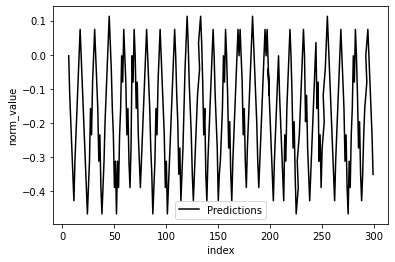

In [199]:
plt.plot(serial_data.index, serial_data['norm_value'], color='k', label='Predictions')
plt.xlabel('index')
plt.ylabel('norm_value')
plt.legend()
plt.show()

In [200]:
train_dataset = serial_data
test_dataset = test_serial_data

In [201]:
train_features = np.array(train_dataset.drop(['norm_value'], axis=1))
train_features = np.array(train_features)[:,:,np.newaxis]
train_features.shape

(294, 6, 1)

In [202]:
train_labels = np.array(train_dataset.drop(['norm_6'], axis=1))
train_labels = train_labels.reshape(train_labels.shape[0],train_labels.shape[1],1)
train_labels.shape

(294, 6, 1)

In [203]:
test_features = np.array(test_dataset.drop(['norm_value'], axis=1))
test_features = test_features.reshape(test_features.shape[0],test_features.shape[1],1)
test_features.shape

(38, 6, 1)

In [204]:
test_labels = np.array(test_dataset.drop(['norm_6'], axis=1))
test_labels = test_labels.reshape(test_labels.shape[0],test_labels.shape[1],1)
test_labels.shape

(38, 6, 1)

In [205]:
model = keras.Sequential()
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.TimeDistributed(layers.Dense(1)))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.005))
# print(model.summary())
model.fit(train_features, train_labels, epochs=200, batch_size=1, verbose=2)


(38, 6, 1)
MSE 0.07845985022688638


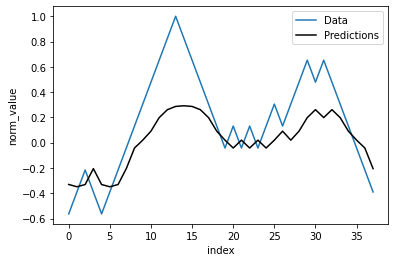

In [206]:
from sklearn.metrics import mean_squared_error

with mlflow.start_run():

    result = model.predict(test_features, batch_size=1, verbose=0)
    print(result.shape)
    x=pd.DataFrame(test_labels.reshape(test_labels.shape[0],test_labels.shape[1]))
    y=pd.DataFrame(result.reshape(result.shape[0],result.shape[1]))
    y_true = np.array(x[0])
    y_pred = np.array(y[0])
    
    mse = mean_squared_error(y_true, y_pred)
    print("MSE", mse)
    
    mlflow.log_metric("MSE",mse)
    mlflow.log_param("test line from ", '{} {}'.format(start_line, end_line))
    mlflow.log_param("Test file", test_file_name)
    plt.plot(x.index, x[0], label='Data')
    plt.plot(y.index, y[0], color='k', label='Predictions')
    plt.xlabel('index')
    plt.ylabel('norm_value')
    plt.legend()
    plt.savefig("BTS_resultGraph.png")
    mlflow.log_artifact("BTS_resultGraph.png")
    plt.show()
    plt.close()

In [51]:
=> data line 200 den 250 lech => 800 den 850
950-1150

SyntaxError: invalid syntax (<ipython-input-51-5ad37c6655e2>, line 1)